In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

In [2]:
df = pd.read_csv('scraped_dataset.csv')

In [3]:
pd.set_option('display.max_columns', None) #no max limit set to dispaly columns 

In [4]:
df.head()

,Date of Booking,Date of Journey,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price
0,15/01/2023,16/01/2023,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335"
1,15/01/2023,16/01/2023,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899"
2,15/01/2023,16/01/2023,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801"
3,15/01/2023,16/01/2023,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794"
4,15/01/2023,16/01/2023,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Date of Booking  452088 non-null  object
 1   Date of Journey  452088 non-null  object
 2   Airline-Class    452088 non-null  object
 3   Departure Time   452088 non-null  object
 4   Arrival Time     452088 non-null  object
 5   Duration         452088 non-null  object
 6   Total Stops      452088 non-null  object
 7   Price            452088 non-null  object
dtypes: object(8)
memory usage: 27.6+ MB


In [6]:
df.dropna(inplace = True)

In [7]:
df.isnull().sum()

Date of Booking    0
Date of Journey    0
Airline-Class      0
Departure Time     0
Arrival Time       0
Duration           0
Total Stops        0
Price              0
dtype: int64

EDA

From description we can see that Date_of_Journey is a object data type,
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

.dt.day method will extract only day of that date
.dt.month method will extract only month of that date


In [8]:
df["Journey_day"] = pd.to_datetime(df["Date of Journey"], format="%d/%m/%Y").dt.day

In [9]:
df["Journey_month"] = pd.to_datetime(df["Date of Journey"], format = "%d/%m/%Y").dt.month

In [10]:
df["Booking_day"] = pd.to_datetime(df["Date of Booking"], format="%d/%m/%Y").dt.day

In [11]:
df["Booking_month"] = pd.to_datetime(df["Date of Booking"], format="%d/%m/%Y").dt.month

In [12]:
df.drop(["Date of Journey"], axis = 1, inplace = True)


In [13]:
df.drop(["Date of Booking"], axis = 1, inplace = True)

In [14]:
df.head()

,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price,Journey_day,Journey_month,Booking_day,Booking_month
0,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335",16,1,15,1
1,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899",16,1,15,1
2,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801",16,1,15,1
3,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794",16,1,15,1
4,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955",16,1,15,1


In [15]:

# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [16]:
# Adding duration_hours and duration_mins list to train_data dataframe

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [17]:
df['Duration'] = df['Duration_hours'] + (df['Duration_mins'] / 100)

In [18]:
df.drop(["Duration_hours"], axis = 1, inplace = True)

In [19]:
df.drop(["Duration_mins"], axis = 1, inplace = True)

In [20]:
df.head()

,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price,Journey_day,Journey_month,Booking_day,Booking_month
0,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,2.05,non-stop,"5,335",16,1,15,1
1,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,2.20,non-stop,"5,899",16,1,15,1
2,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,2.10,non-stop,"5,801",16,1,15,1
3,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,2.05,non-stop,"5,794",16,1,15,1
4,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,2.10,non-stop,"5,955",16,1,15,1


In [21]:
df['Airline'] = df['Airline-Class'].str.split('\n').str[0]
df['flight'] = df['Airline-Class'].str.split('\n').str[1]
df['class'] = df['Airline-Class'].str.split('\n').str[2]

In [22]:
df['Departure time'] = df['Departure Time'].str.split('\n').str[0]
df['Source city'] = df['Departure Time'].str.split('\n').str[1]

df['Arrival time'] = df['Arrival Time'].str.split('\n').str[0]
df['Destination city'] = df['Arrival Time'].str.split('\n').str[1]


In [23]:
df.drop(["Airline-Class"], axis = 1, inplace = True)
df.drop(["Departure Time"], axis = 1, inplace = True)
df.drop(["Arrival Time"], axis = 1, inplace = True)

In [24]:
df.head()

,Duration,Total Stops,Price,Journey_day,Journey_month,Booking_day,Booking_month,Airline,flight,class,Departure time,Source city,Arrival time,Destination city
0,2.05,non-stop,"5,335",16,1,15,1,SpiceJet,SG-8169,ECONOMY,20:00,Delhi,22:05,Mumbai
1,2.20,non-stop,"5,899",16,1,15,1,Indigo,6E-2519,ECONOMY,23:00,Delhi,01:20,Mumbai
2,2.10,non-stop,"5,801",16,1,15,1,GO FIRST,G8- 354,ECONOMY,22:30,Delhi,00:40,Mumbai
3,2.05,non-stop,"5,794",16,1,15,1,SpiceJet,SG-8709,ECONOMY,18:50,Delhi,20:55,Mumbai
4,2.10,non-stop,"5,955",16,1,15,1,Air India,AI-805,ECONOMY,20:00,Delhi,22:10,Mumbai


VISUALIZATIONS

**-most flight useed in the airlines

In [25]:
df['flight'].value_counts()

flight
UK-936     5506
UK-918     5349
UK-706     5243
UK-926     4551
UK-832     4516
           ... 
6E- 435       1
6E- 251       1
6E-2417       1
6E-6398       1
G8- 911       1
Name: count, Length: 1405, dtype: int64

In [26]:
len(df['flight'].value_counts())

1405

**- Top 7 source city and the distenision by price

In [27]:
x= df.groupby(['Source city','Destination city'])['Price'].sum().reset_index().sort_values(["Price"], ascending = False)
x[0:7]

,Source city,Destination city,Price
1,Ahmedabad,Chennai,"8,8768,5588,5589,1389,2099,2099,2099,2099,2099..."
35,Kolkata,Mumbai,"8,6078,6079,8669,8669,8668,8708,8708,8708,8708..."
5,Ahmedabad,Mumbai,"8,2888,6468,6468,8389,5789,93810,77710,83610,8..."
34,Kolkata,Hyderabad,"7,8717,8727,8727,8727,8727,8728,5028,5028,5021..."
32,Kolkata,Chennai,"7,7678,7028,7028,7019,1329,5529,5529,59310,369..."
41,Mumbai,Kolkata,"7,7037,7037,7037,7039,3027,7047,7047,7047,7047..."
4,Ahmedabad,Kolkata,"7,4377,9968,3568,9328,8138,8419,89111,51612,53..."


**high 5 flights are used in the airlines and prices of them

In [28]:
n=df.groupby(['flight','Airline'])['Price'].count().reset_index().sort_values(["Price"], ascending = False)
n[0:5]

,flight,Airline,Price
1367,UK-936,Vistara,5506
1358,UK-918,Vistara,5349
1258,UK-706,Vistara,5243
1360,UK-926,Vistara,4551
1305,UK-832,Vistara,4516


**TOP 5 FLIGHTS AND AIRLINES BASED ON PRICE

C:\Users\janvi.yadav\AppData\Local\Temp\ipykernel_17828\2283441420.py:6: UserWarning: The palette list has more values (5) than needed (1), which may not be intended.
  ax = sns.barplot(x='flight', y='Price', hue='Airline', data=top_5_flights, palette=colors)


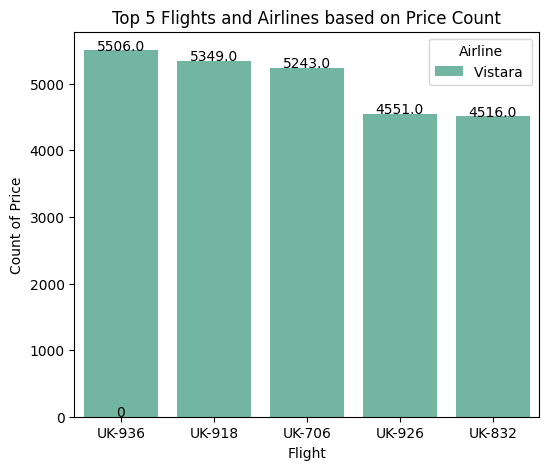

In [29]:
n = df.groupby(['flight', 'Airline'])['Price'].count().reset_index().sort_values(["Price"], ascending=False)
top_5_flights = n.head(5)

plt.figure(figsize=(6, 5))
colors = sns.color_palette('Set2', len(top_5_flights))
ax = sns.barplot(x='flight', y='Price', hue='Airline', data=top_5_flights, palette=colors)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.xlabel('Flight')
plt.ylabel('Count of Price')
plt.title('Top 5 Flights and Airlines based on Price Count')
plt.show()

Finding: MOST Flight Used IS UK-936 and most flights used is Vstara airlines

In [30]:
eco=df[df['class']=='ECONOMY']

In [31]:
eco['Airline'].value_counts()

Airline
Vistara         83847
Air India       67429
Indigo          65659
AirAsia         15764
GO FIRST        10786
SpiceJet         5863
AkasaAir         2230
AllianceAir       393
StarAir            62
Name: count, dtype: int64

**What is the most airline used in economy class and who has the most outcomes

Text(0.5, 1.0, 'Distibution of most airlines in economy class')

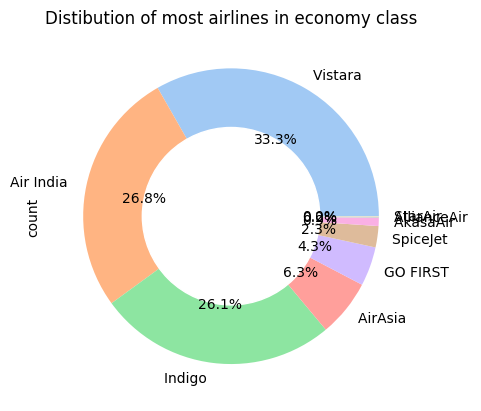

In [32]:
colors = sns.color_palette('pastel')
eco['Airline'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)

my_circle = plt.Circle((0, 0), 0.6, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.title('Distibution of most airlines in economy class')

In [33]:
n=eco.groupby(['Airline'])['Price'].sum().reset_index().sort_values(by='Price',ascending=False)
n


,Airline,Price
2,AkasaAir,"9,0405,6905,6415,5905,8405,8405,8405,7905,7907..."
8,Vistara,"7,3208,0558,3708,4918,4918,5809,3319,3319,5931..."
3,AllianceAir,"6,9006,2704,6954,6954,6954,6956,2703,2463,2464..."
1,AirAsia,"6,6406,8726,8726,8726,8726,8726,8726,8726,8726..."
0,Air India,"5,9555,9555,9557,1947,1947,1947,1947,3207,3207..."
5,Indigo,"5,8996,3907,3197,3197,3197,3197,3197,3197,3197..."
4,GO FIRST,"5,8015,8995,8997,3216,8736,8736,8736,8736,8736..."
6,SpiceJet,"5,3355,7945,82910,5734,4605,3355,3355,3354,364..."
7,StarAir,"24,64720,04710,39710,3978,0098,0098,0093,49231..."


In [34]:

# Sample DataFrame 'n'
data = {'Airline': ['AkasaAir', 'Vistara', 'AllianceAir', 'AirAsia', 'Air India', 'Indigo', 'GO FIRST', 'SpiceJet', 'StarAir'],
        'Price': ['9,040,5,690,5,641,5,590,5,840,5,840,5,840,5,790,5,790', 
                  '7,320,8,055,8,370,8,491,8,491,8,580,9,331,9,331,9,593',
                  '6,900,6,270,4,695,4,695,4,695,4,695,6,270,3,246,3,246,4,150', 
                  '6,640,6,872,6,872,6,872,6,872,6,872,6,872,6,872,6,872', 
                  '5,955,5,955,5,955,7,194,7,194,7,194,7,194,3,207,3,207', 
                  '5,899,6,390,7,319,7,319,7,319,7,319,7,319,7,319,7,319',
                  '5,801,5,899,5,899,7,321,6,873,6,873,6,873,6,873,6,873', 
                  '5,335,5,794,5,829,10,573,4,460,5,335,5,335,5,335,4,364', 
                  '24,647,20,047,10,397,10,397,8,009,8,009,8,009,3,492,31,492']}

n = pd.DataFrame(data)

# Function to calculate the sum of prices for each airline
def calculate_sum(price_str):
    # Split the comma-separated values, convert to integers, and sum them
    prices = [int(price.replace(',', '')) for price in price_str.split(',')]
    return sum(prices)

# Apply the function to each row in the DataFrame to calculate the sum of prices
n['Total Price'] = n['Price'].apply(calculate_sum)

# Sort the DataFrame by the total price in descending order
n_sorted = n.sort_values(by='Total Price', ascending=False)

print(n_sorted)


       Airline                                              Price  Total Price
3      AirAsia  6,640,6,872,6,872,6,872,6,872,6,872,6,872,6,87...         7670
6     GO FIRST  5,801,5,899,5,899,7,321,6,873,6,873,6,873,6,87...         7337
0     AkasaAir  9,040,5,690,5,641,5,590,5,840,5,840,5,840,5,79...         6110
2  AllianceAir  6,900,6,270,4,695,4,695,4,695,4,695,6,270,3,24...         4906
7     SpiceJet  5,335,5,794,5,829,10,573,4,460,5,335,5,335,5,3...         4408
4    Air India  5,955,5,955,5,955,7,194,7,194,7,194,7,194,3,20...         4104
1      Vistara  7,320,8,055,8,370,8,491,8,491,8,580,9,331,9,33...         3636
5       Indigo  5,899,6,390,7,319,7,319,7,319,7,319,7,319,7,31...         3582
8      StarAir  24,647,20,047,10,397,10,397,8,009,8,009,8,009,...         2621


**Which city is most used in economic tickets?

Text(0.5, 1.0, 'distrbution of source city in eco class')

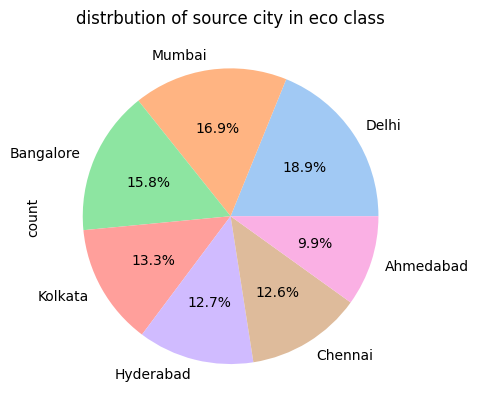

In [35]:
eco['Source city'].value_counts().plot(kind='pie', autopct='%1.1f%%',colors=colors)
plt.title('distrbution of source city in eco class')

Finding: 1- The Most used Airline Also Achieves the Highest Profit is Vistara and next is Airindia and

 2- Most city use econimic class is Delhi and after that is Mumbai

**most airlines used in business class and out comes

In [36]:
unique_classes = df['class'].unique()
print(unique_classes)

['ECONOMY' 'PREMIUMECONOMY' 'BUSINESS' 'FIRST']


In [37]:
bus = df[df['class']=='BUSINESS']

<Axes: ylabel='count'>

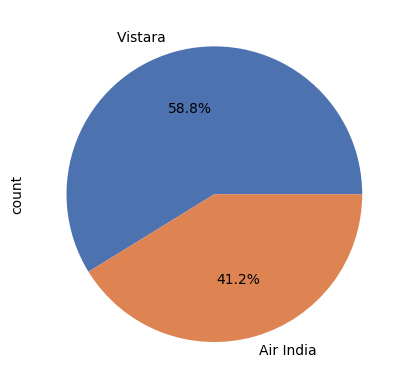

In [38]:
colors = sns.color_palette('deep')
bus['Airline'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)

In [39]:
m=bus.groupby(['Airline'])['Price'].sum().reset_index().sort_values(by='Price', ascending=False)
m

,Airline,Price
1,Vistara,"30,10437,19337,19337,19340,77740,77741,52849,0..."
0,Air India,"25,61225,61225,61225,61225,61225,61225,61225,6..."


C:\Users\janvi.yadav\AppData\Local\Temp\ipykernel_17828\726759361.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=colors_count.index, y=colors_count.values, palette=colors)


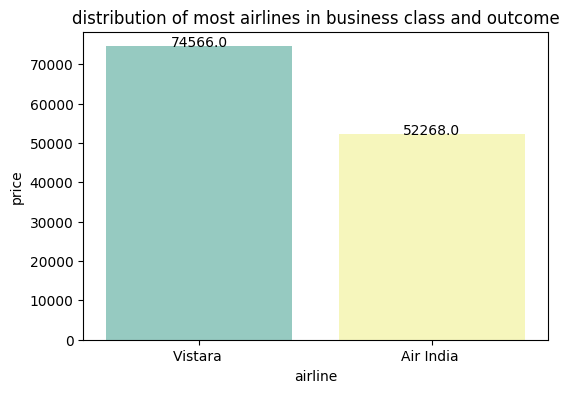

In [40]:
colors_count = bus['Airline'].value_counts()

plt.figure(figsize=(6, 4))
colors = sns.color_palette('Set3', len(colors_count))
ax = sns.barplot(x=colors_count.index, y=colors_count.values, palette=colors)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.xlabel('airline')
plt.ylabel('price')
plt.title('distribution of most airlines in business class and outcome')

plt.show()

Text(0.5, 1.0, 'distribution of cities used business class tickiets')

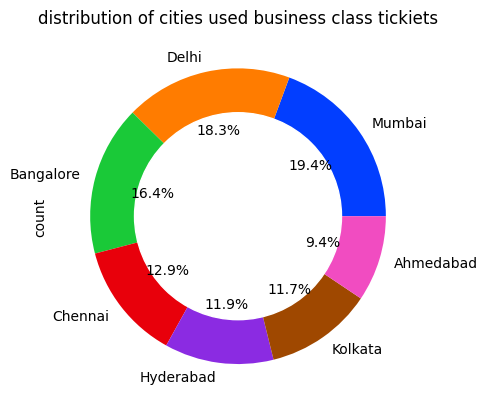

In [41]:
colors = sns.color_palette('bright')
bus['Source city'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)

my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.title('distribution of cities used business class tickiets')

Finding: There are Only Two Companies that have the Business Class and the Common Used and Have Most outcomes is Vistara and Most city Use Business class is Mumbai and after that is Delhi

**Does price vary with Airlines?

In [42]:
df.head()

,Duration,Total Stops,Price,Journey_day,Journey_month,Booking_day,Booking_month,Airline,flight,class,Departure time,Source city,Arrival time,Destination city
0,2.05,non-stop,"5,335",16,1,15,1,SpiceJet,SG-8169,ECONOMY,20:00,Delhi,22:05,Mumbai
1,2.20,non-stop,"5,899",16,1,15,1,Indigo,6E-2519,ECONOMY,23:00,Delhi,01:20,Mumbai
2,2.10,non-stop,"5,801",16,1,15,1,GO FIRST,G8- 354,ECONOMY,22:30,Delhi,00:40,Mumbai
3,2.05,non-stop,"5,794",16,1,15,1,SpiceJet,SG-8709,ECONOMY,18:50,Delhi,20:55,Mumbai
4,2.10,non-stop,"5,955",16,1,15,1,Air India,AI-805,ECONOMY,20:00,Delhi,22:10,Mumbai


In [43]:
# Finding unique flight numbers
unique_flights = df['flight'].unique()

# Printing unique flight numbers
print("Unique flight numbers:", unique_flights)

Unique flight numbers: ['SG-8169' '6E-2519' 'G8- 354' ... '6E-6493' '6E-7073' '6E- 348']


In [44]:
# Clean 'Price' column to remove non-numeric characters
df['Price'] = df['Price'].str.replace(',', '')  # Remove commas

# Convert 'Price' column to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# df2 = df.groupby(['Airline'])['Price'].median()
# df2

In [45]:
df.head()

,Duration,Total Stops,Price,Journey_day,Journey_month,Booking_day,Booking_month,Airline,flight,class,Departure time,Source city,Arrival time,Destination city
0,2.05,non-stop,5335,16,1,15,1,SpiceJet,SG-8169,ECONOMY,20:00,Delhi,22:05,Mumbai
1,2.20,non-stop,5899,16,1,15,1,Indigo,6E-2519,ECONOMY,23:00,Delhi,01:20,Mumbai
2,2.10,non-stop,5801,16,1,15,1,GO FIRST,G8- 354,ECONOMY,22:30,Delhi,00:40,Mumbai
3,2.05,non-stop,5794,16,1,15,1,SpiceJet,SG-8709,ECONOMY,18:50,Delhi,20:55,Mumbai
4,2.10,non-stop,5955,16,1,15,1,Air India,AI-805,ECONOMY,20:00,Delhi,22:10,Mumbai


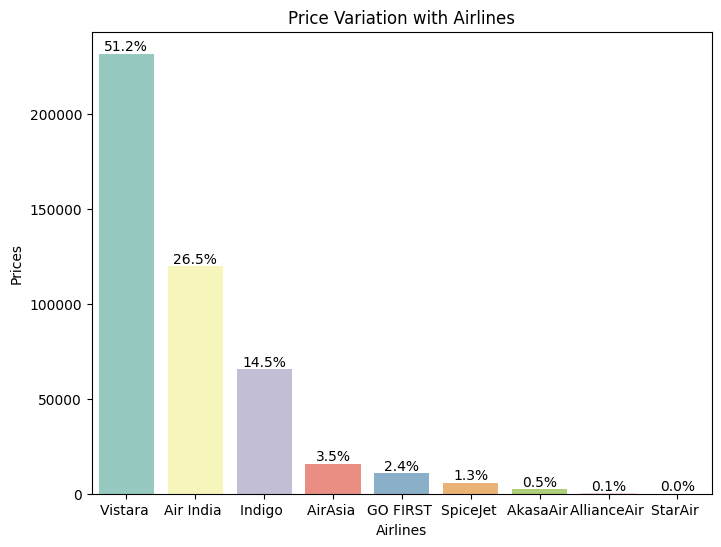

In [46]:

dm = df['Airline'].value_counts()
total_customers = len(df)

percentages = dm / total_customers * 100

# Choose a different color palette from Seaborn
colors = sns.color_palette('Set3', n_colors=len(dm))

plt.figure(figsize=(8, 6))
sns.barplot(x=dm.index, y=dm, hue=dm.index, palette=colors, dodge=False, legend=False)

for i, p in enumerate(plt.gca().patches):
    percentage = '{:.1f}%'.format(percentages.iloc[i])
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.5
    plt.text(x, y, percentage, ha='center', va='bottom', fontsize=10, color='black')

plt.title('Price Variation with Airlines')
plt.xlabel('Airlines')
plt.ylabel('Prices')

plt.show()

**How does the ticket price vary between Economy and Business class?

<Axes: title={'center': 'vary between class'}, ylabel='Price'>

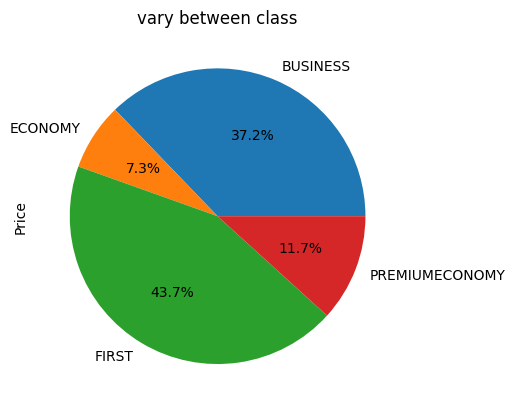

In [47]:
df.groupby(['class'])['Price'].mean().plot(kind='pie',title='vary between class',autopct = "%1.1f%%")

**How the price changes with change in Source and Destination?

Text(0.5, 0.98, 'price vary with source and destination city')

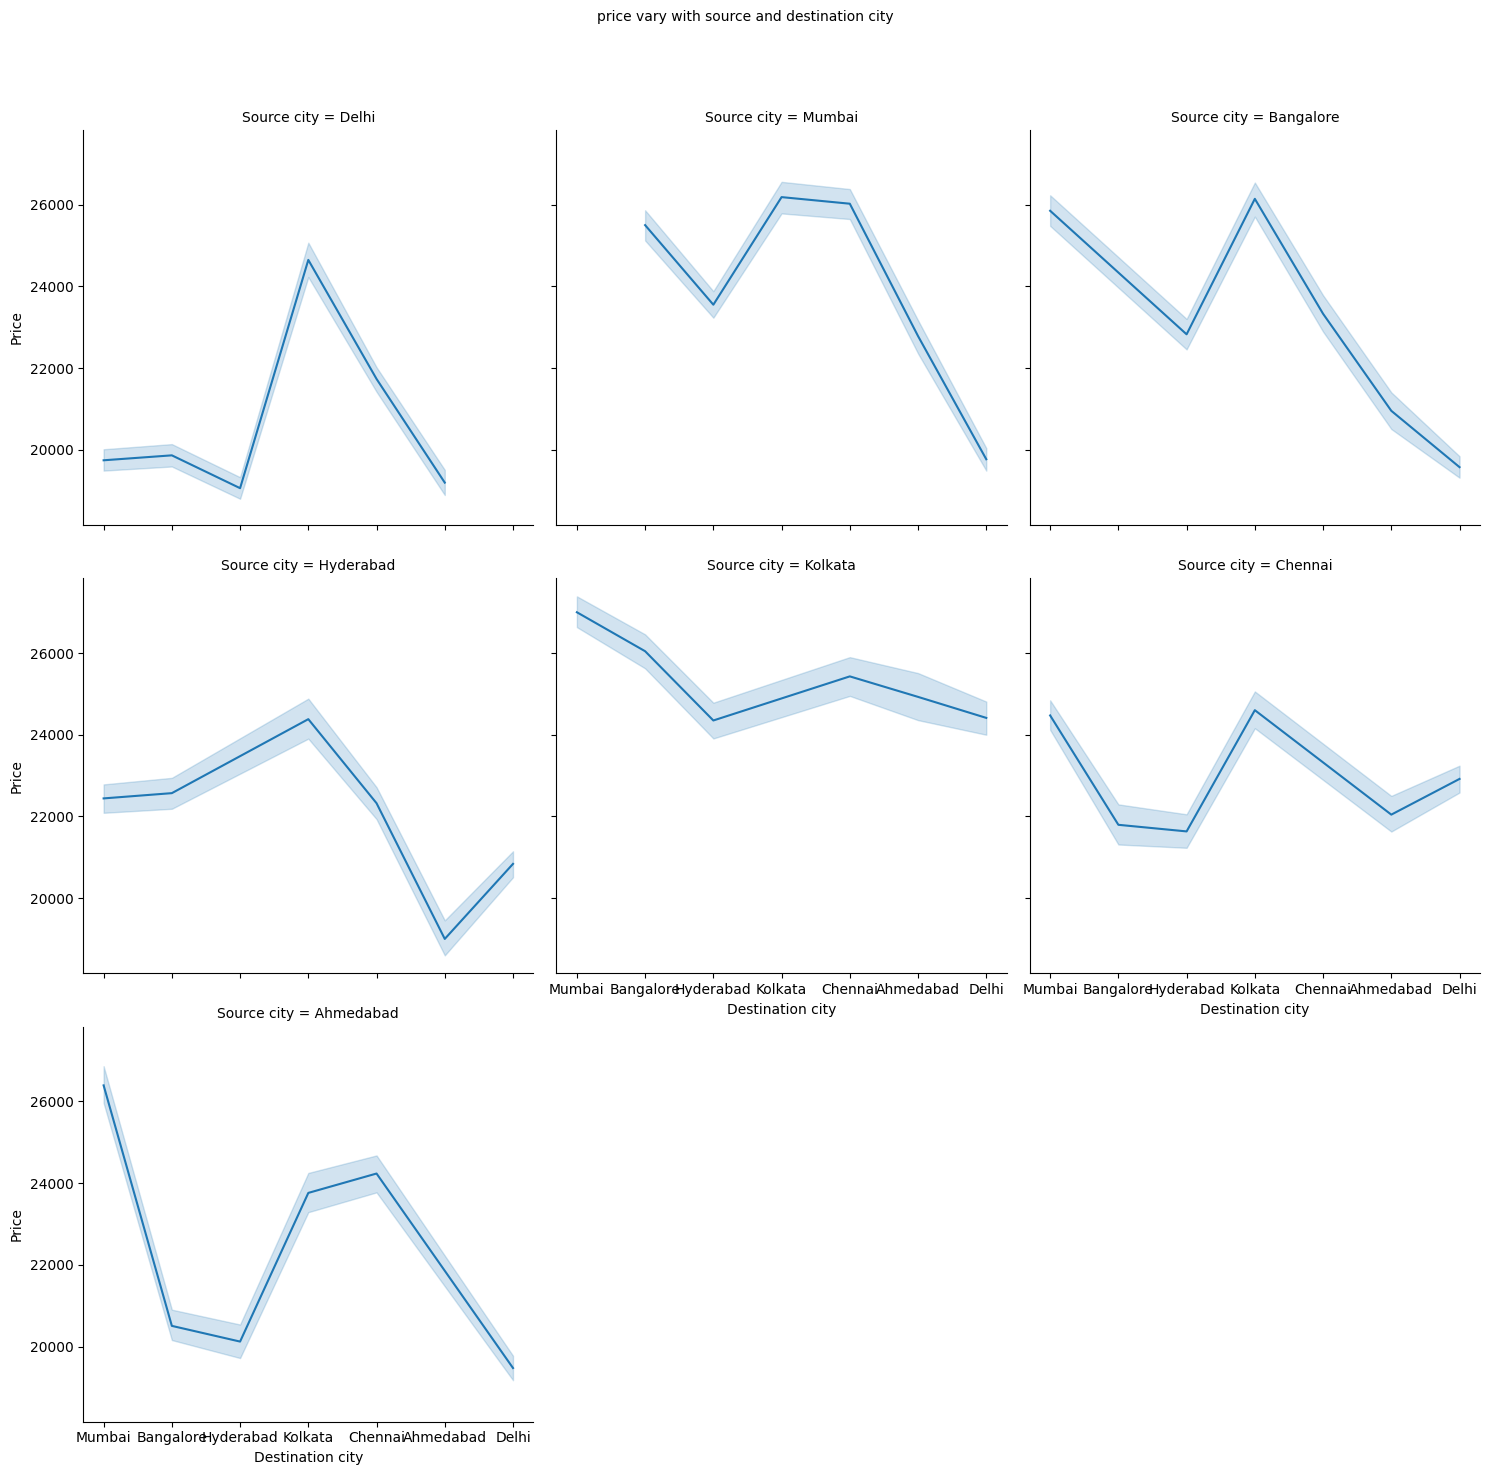

In [48]:
mx = sns.relplot(col ='Source city',y='Price',kind = 'line',x='Destination city',data=df,col_wrap=3 )
mx.fig.subplots_adjust(top=0.9)
mx.fig.suptitle('price vary with source and destination city', fontsize=10)

Finding: From this graph,it implies that flight leaving and arriving at Delhi are often cheaper whereas flights leaving and arriving at Kolkata are the high priced..

**How does the ticket price vary with the number of stops of a Flight?

In [49]:
# Convert 'Total Stops' column to string type
df['Total Stops'] = df['Total Stops'].astype(str)

# Extracting the first part of the strings before '\n'
df['Total Stops'] = df['Total Stops'].apply(lambda x: x.split('\n')[0])

# Generating the value counts after collapsing categories
value_counts_collapsed = df['Total Stops'].value_counts()

# Displaying the collapsed value counts
print(value_counts_collapsed)

Total Stops
1-stop      369650
non-stop     51755
2+-stop      30683
Name: count, dtype: int64


<Axes: ylabel='count'>

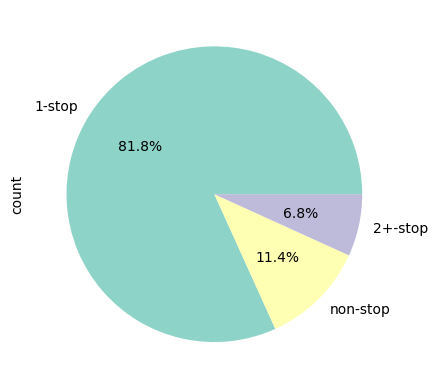

In [50]:
df['Total Stops'].value_counts().plot(kind='pie', autopct="%1.1f%%", colors=colors)

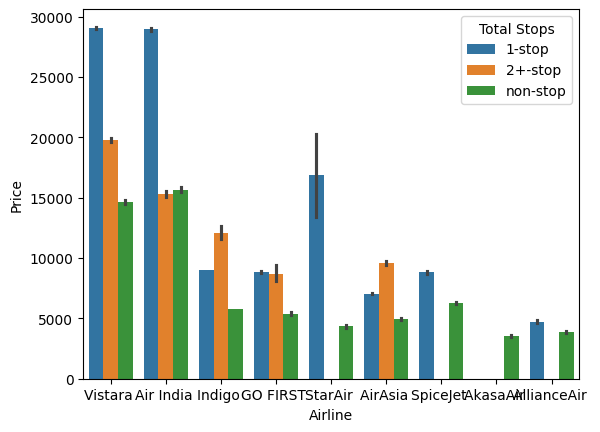

In [51]:
# Assuming data is a DataFrame
df = pd.DataFrame(df)

# Sort the DataFrame by the 'Price' column in descending order
data_sorted = df.sort_values("Price", ascending=False)

# Plot the barplot
sns.barplot(y="Price", x="Airline", hue="Total Stops", data=data_sorted)

# Show the plot
plt.show()

Finding One Stop Flight is Most Used in Airlines by 81.8 Percentage.

And Most air lines used one stop is Vistiria and Air India.

 ##PREPROCESSING

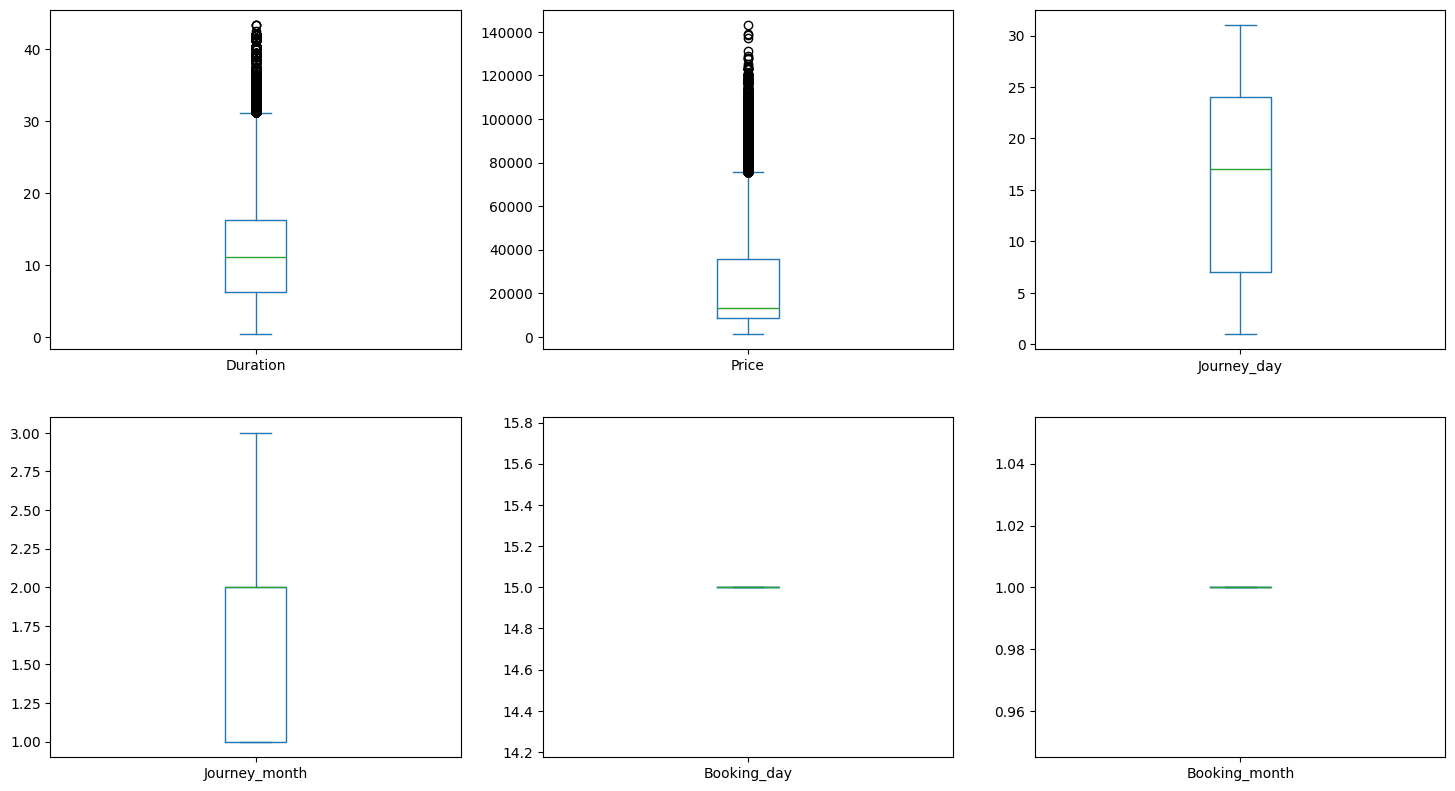

In [52]:
df.plot(kind='box',subplots = True,layout=(3,3),figsize=(18,15))
plt.show()

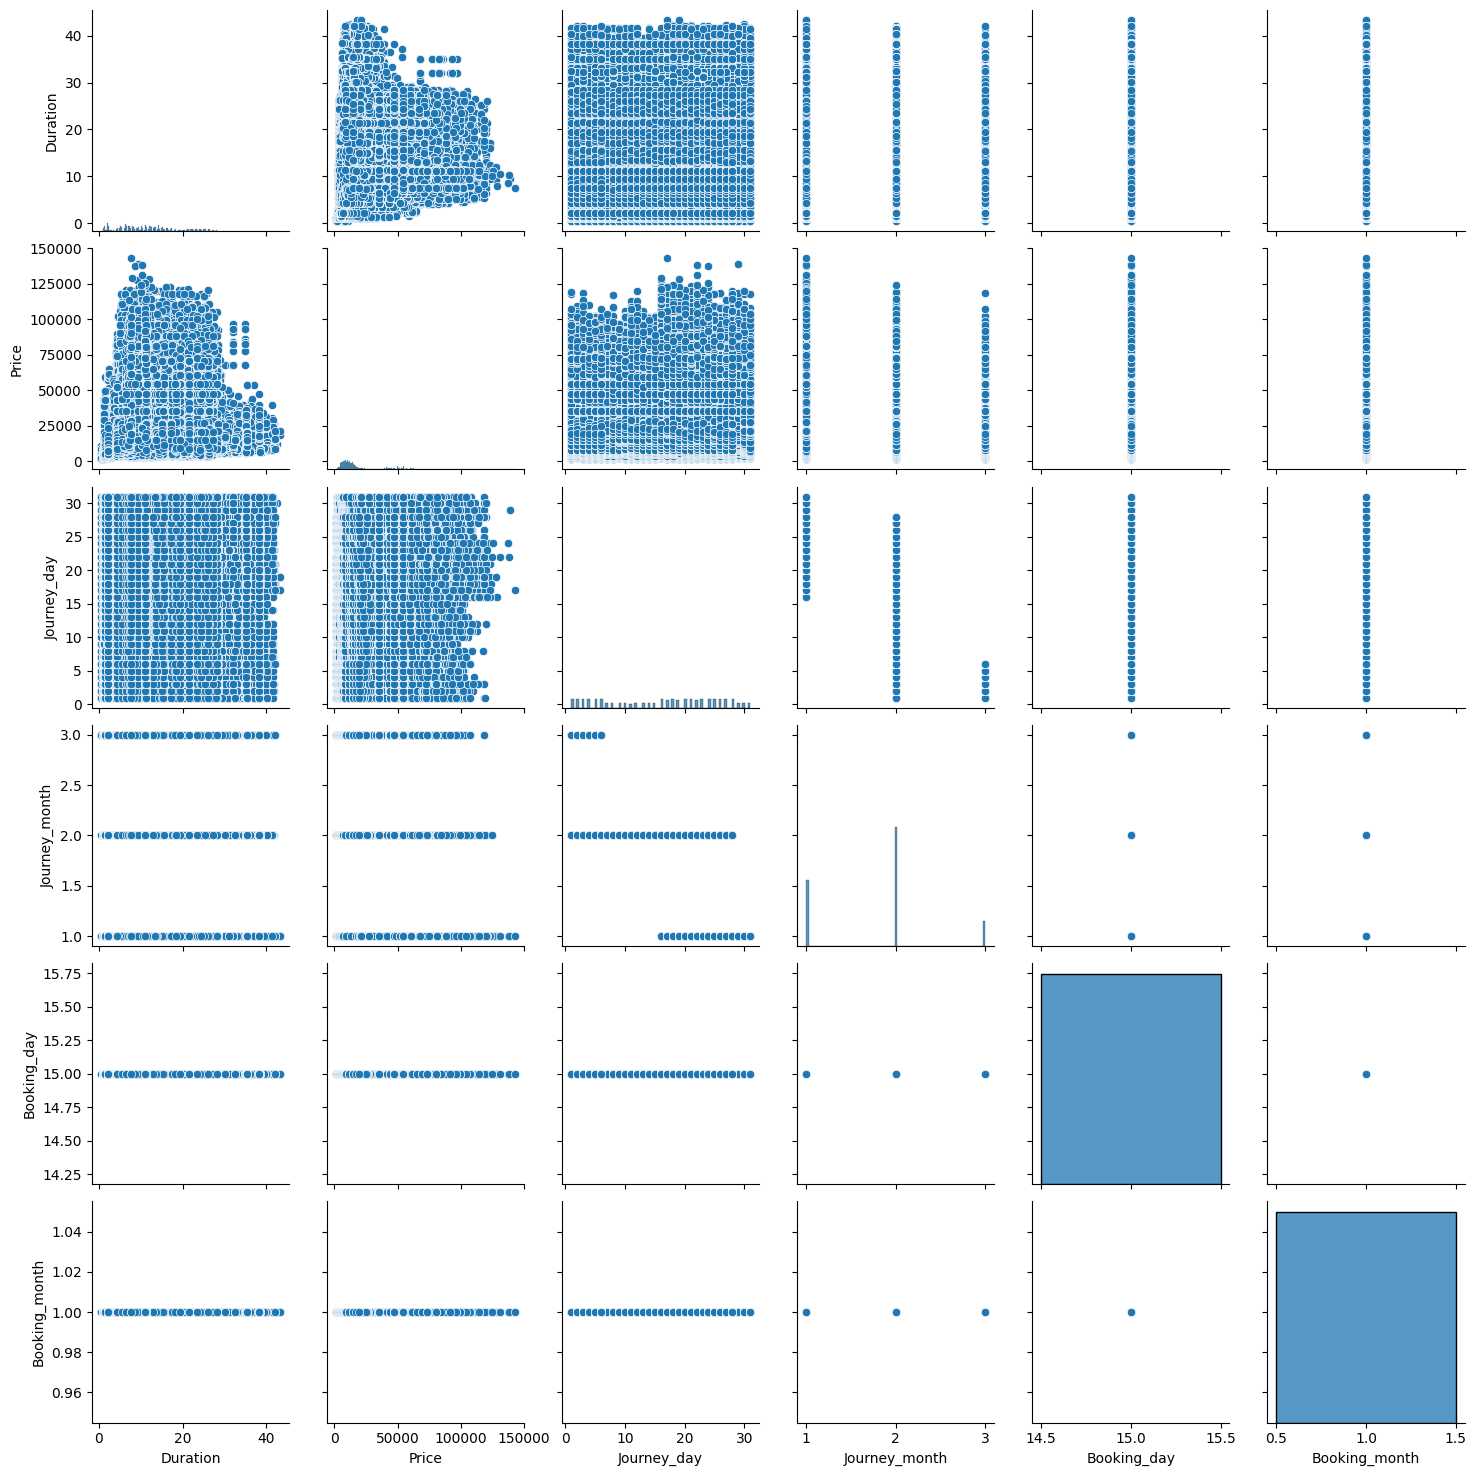

In [53]:
sns.pairplot(df)


In [54]:
duplicated=df.duplicated()
num_dup = duplicated.sum()


In [55]:
# If there are duplicated rows, remove them
if num_dup > 0:
    data = df.drop_duplicates()
    print(f"{num_dup} duplicated rows removed.")
else:
    print("There are no duplicated rows.")

6722 duplicated rows removed.


In [56]:
df.describe(include='object')

,Total Stops,Airline,flight,class,Departure time,Source city,Arrival time,Destination city
count,452088,452088,452088,452088,452088,452088,452088,452088
unique,3,9,1405,4,257,7,266,7
top,1-stop,Vistara,UK-936,ECONOMY,20:30,Delhi,19:50,Mumbai
freq,369650,231490,5506,252033,15576,83153,14037,82995


In [57]:
df.head()

,Duration,Total Stops,Price,Journey_day,Journey_month,Booking_day,Booking_month,Airline,flight,class,Departure time,Source city,Arrival time,Destination city
0,2.05,non-stop,5335,16,1,15,1,SpiceJet,SG-8169,ECONOMY,20:00,Delhi,22:05,Mumbai
1,2.20,non-stop,5899,16,1,15,1,Indigo,6E-2519,ECONOMY,23:00,Delhi,01:20,Mumbai
2,2.10,non-stop,5801,16,1,15,1,GO FIRST,G8- 354,ECONOMY,22:30,Delhi,00:40,Mumbai
3,2.05,non-stop,5794,16,1,15,1,SpiceJet,SG-8709,ECONOMY,18:50,Delhi,20:55,Mumbai
4,2.10,non-stop,5955,16,1,15,1,Air India,AI-805,ECONOMY,20:00,Delhi,22:10,Mumbai


In [58]:
# Create LabelEncoder instances
from sklearn.preprocessing import LabelEncoder
airline_encoder = LabelEncoder()
source_city_encoder = LabelEncoder()
destination_city_encoder = LabelEncoder()
departure_time_encoder = LabelEncoder()
arrival_time_encoder = LabelEncoder()
stops_encoder = LabelEncoder()
class_encoder = LabelEncoder()
Duration_encoder = LabelEncoder()
Journey_day_encoder = LabelEncoder()
Journey_month_encoder = LabelEncoder()

In [59]:
# Fit and transform the categorical columns in the DataFrame
df['Airline'] = airline_encoder.fit_transform(df['Airline'])
df['Source city'] = source_city_encoder.fit_transform(df['Source city'])
df['Destination city'] = destination_city_encoder.fit_transform(df['Destination city'])
df['Departure time'] = departure_time_encoder.fit_transform(df['Departure time'])
df['Arrival time'] = arrival_time_encoder.fit_transform(df['Arrival time'])
df['Total Stops'] = stops_encoder.fit_transform(df['Total Stops'])
df['class'] = class_encoder.fit_transform(df['class'])
df['Duration'] = Duration_encoder.fit_transform(df['Duration'])
df['Journey_day'] = Journey_day_encoder.fit_transform(df['Journey_day'])
df['Journey_month'] = Journey_month_encoder.fit_transform(df['Journey_month'])


In [60]:
df.head()

,Duration,Total Stops,Price,Journey_day,Journey_month,Booking_day,Booking_month,Airline,flight,class,Departure time,Source city,Arrival time,Destination city
0,17,2,5335,15,0,15,1,6,SG-8169,1,210,3,242,6
1,20,2,5899,15,0,15,1,5,6E-2519,1,246,3,16,6
2,18,2,5801,15,0,15,1,4,G8- 354,1,240,3,8,6
3,17,2,5794,15,0,15,1,6,SG-8709,1,196,3,228,6
4,18,2,5955,15,0,15,1,0,AI-805,1,210,3,243,6


In [61]:
stops_mapping = dict(zip(stops_encoder.classes_, stops_encoder.transform(stops_encoder.classes_)))
print(stops_mapping)

{'1-stop': 0, '2+-stop': 1, 'non-stop': 2}


In [62]:
airline_mapping = dict(zip(airline_encoder.classes_, airline_encoder.transform(airline_encoder.classes_)))
print(airline_mapping)

{'Air India ': 0, 'AirAsia ': 1, 'AkasaAir ': 2, 'AllianceAir ': 3, 'GO FIRST ': 4, 'Indigo ': 5, 'SpiceJet ': 6, 'StarAir ': 7, 'Vistara ': 8}


In [63]:
source_city_mapping = dict(zip(source_city_encoder.classes_, source_city_encoder.transform(source_city_encoder.classes_)))
print(source_city_mapping)

{'Ahmedabad': 0, 'Bangalore': 1, 'Chennai': 2, 'Delhi': 3, 'Hyderabad': 4, 'Kolkata': 5, 'Mumbai': 6}


In [64]:
destination_city_mapping = dict(zip(destination_city_encoder.classes_, destination_city_encoder.transform(destination_city_encoder.classes_)))
print(destination_city_mapping)

{'Ahmedabad': 0, 'Bangalore': 1, 'Chennai': 2, 'Delhi': 3, 'Hyderabad': 4, 'Kolkata': 5, 'Mumbai': 6}


In [65]:
departure_time_mapping = dict(zip(departure_time_encoder.classes_, departure_time_encoder.transform(departure_time_encoder.classes_)))
print(departure_time_mapping)

{'00:05': 0, '00:15': 1, '00:30': 2, '01:05': 3, '01:10': 4, '01:15': 5, '01:40': 6, '01:45': 7, '01:55': 8, '02:00': 9, '02:10': 10, '02:30': 11, '02:40': 12, '02:45': 13, '03:00': 14, '03:25': 15, '03:30': 16, '03:55': 17, '04:00': 18, '04:05': 19, '04:10': 20, '04:15': 21, '04:20': 22, '04:25': 23, '04:30': 24, '04:35': 25, '04:40': 26, '04:45': 27, '04:50': 28, '04:55': 29, '05:00': 30, '05:05': 31, '05:10': 32, '05:15': 33, '05:20': 34, '05:25': 35, '05:30': 36, '05:35': 37, '05:40': 38, '05:45': 39, '05:50': 40, '05:55': 41, '06:00': 42, '06:05': 43, '06:10': 44, '06:15': 45, '06:20': 46, '06:25': 47, '06:30': 48, '06:35': 49, '06:40': 50, '06:45': 51, '06:50': 52, '06:55': 53, '07:00': 54, '07:05': 55, '07:10': 56, '07:15': 57, '07:20': 58, '07:25': 59, '07:30': 60, '07:35': 61, '07:40': 62, '07:45': 63, '07:50': 64, '07:55': 65, '08:00': 66, '08:05': 67, '08:10': 68, '08:15': 69, '08:20': 70, '08:25': 71, '08:30': 72, '08:35': 73, '08:40': 74, '08:45': 75, '08:50': 76, '08:55':

In [66]:
dt = np.array(departure_time_encoder.classes_)
print(type(dt[0]))


<class 'str'>


In [67]:
arrival_time_mapping = dict(zip(arrival_time_encoder.classes_, arrival_time_encoder.transform(arrival_time_encoder.classes_)))
print(arrival_time_mapping)

{'00:00': 0, '00:05': 1, '00:10': 2, '00:15': 3, '00:20': 4, '00:25': 5, '00:30': 6, '00:35': 7, '00:40': 8, '00:45': 9, '00:50': 10, '00:55': 11, '01:00': 12, '01:05': 13, '01:10': 14, '01:15': 15, '01:20': 16, '01:25': 17, '01:30': 18, '01:35': 19, '01:40': 20, '01:45': 21, '01:50': 22, '01:55': 23, '02:00': 24, '02:05': 25, '02:10': 26, '02:15': 27, '02:20': 28, '02:30': 29, '02:40': 30, '02:45': 31, '02:55': 32, '03:00': 33, '03:05': 34, '03:45': 35, '03:50': 36, '03:55': 37, '04:00': 38, '04:15': 39, '04:20': 40, '04:45': 41, '04:50': 42, '05:10': 43, '05:15': 44, '05:25': 45, '05:35': 46, '05:45': 47, '05:50': 48, '05:55': 49, '06:05': 50, '06:10': 51, '06:15': 52, '06:20': 53, '06:25': 54, '06:30': 55, '06:35': 56, '06:40': 57, '06:45': 58, '06:50': 59, '06:55': 60, '07:00': 61, '07:05': 62, '07:10': 63, '07:15': 64, '07:20': 65, '07:25': 66, '07:30': 67, '07:35': 68, '07:40': 69, '07:45': 70, '07:50': 71, '07:55': 72, '08:00': 73, '08:05': 74, '08:10': 75, '08:15': 76, '08:20':

In [68]:
at= [arrival_time_encoder.classes_]
print(at)

[array(['00:00', '00:05', '00:10', '00:15', '00:20', '00:25', '00:30',
       '00:35', '00:40', '00:45', '00:50', '00:55', '01:00', '01:05',
       '01:10', '01:15', '01:20', '01:25', '01:30', '01:35', '01:40',
       '01:45', '01:50', '01:55', '02:00', '02:05', '02:10', '02:15',
       '02:20', '02:30', '02:40', '02:45', '02:55', '03:00', '03:05',
       '03:45', '03:50', '03:55', '04:00', '04:15', '04:20', '04:45',
       '04:50', '05:10', '05:15', '05:25', '05:35', '05:45', '05:50',
       '05:55', '06:05', '06:10', '06:15', '06:20', '06:25', '06:30',
       '06:35', '06:40', '06:45', '06:50', '06:55', '07:00', '07:05',
       '07:10', '07:15', '07:20', '07:25', '07:30', '07:35', '07:40',
       '07:45', '07:50', '07:55', '08:00', '08:05', '08:10', '08:15',
       '08:20', '08:25', '08:30', '08:35', '08:40', '08:45', '08:50',
       '08:55', '09:00', '09:05', '09:10', '09:15', '09:20', '09:25',
       '09:30', '09:35', '09:40', '09:45', '09:50', '09:55', '10:00',
       '10:05', '10

In [69]:
class_mapping = dict(zip(class_encoder.classes_, class_encoder.transform(class_encoder.classes_)))
print(class_mapping)

{'BUSINESS': 0, 'ECONOMY': 1, 'FIRST': 2, 'PREMIUMECONOMY': 3}


In [70]:
duration_mapping = dict(zip(Duration_encoder.classes_, Duration_encoder.transform(Duration_encoder.classes_)))
print(duration_mapping)

{0.45: 0, 0.5: 1, 0.55: 2, 1.0: 3, 1.05: 4, 1.1: 5, 1.15: 6, 1.2: 7, 1.25: 8, 1.3: 9, 1.34: 10, 1.35: 11, 1.4: 12, 1.45: 13, 1.5: 14, 1.55: 15, 2.0: 16, 2.05: 17, 2.1: 18, 2.15: 19, 2.2: 20, 2.25: 21, 2.3: 22, 2.35: 23, 2.4: 24, 2.45: 25, 2.5: 26, 2.55: 27, 3.0: 28, 3.05: 29, 3.1: 30, 3.15: 31, 3.2: 32, 3.25: 33, 3.3: 34, 3.35: 35, 3.4: 36, 3.45: 37, 3.5: 38, 3.55: 39, 4.0: 40, 4.05: 41, 4.1: 42, 4.15: 43, 4.2: 44, 4.25: 45, 4.3: 46, 4.35: 47, 4.4: 48, 4.45: 49, 4.5: 50, 4.55: 51, 5.0: 52, 5.05: 53, 5.1: 54, 5.15: 55, 5.2: 56, 5.25: 57, 5.3: 58, 5.35: 59, 5.4: 60, 5.45: 61, 5.5: 62, 5.55: 63, 6.0: 64, 6.05: 65, 6.1: 66, 6.15: 67, 6.2: 68, 6.25: 69, 6.3: 70, 6.35: 71, 6.4: 72, 6.45: 73, 6.5: 74, 6.55: 75, 7.0: 76, 7.05: 77, 7.1: 78, 7.15: 79, 7.2: 80, 7.25: 81, 7.3: 82, 7.35: 83, 7.4: 84, 7.45: 85, 7.5: 86, 7.55: 87, 8.0: 88, 8.05: 89, 8.1: 90, 8.15: 91, 8.2: 92, 8.25: 93, 8.3: 94, 8.35: 95, 8.4: 96, 8.45: 97, 8.5: 98, 8.55: 99, 9.0: 100, 9.05: 101, 9.1: 102, 9.15: 103, 9.2: 104, 9.25: 

In [71]:
Journey_day_mapping = dict(zip(Journey_day_encoder.classes_, Journey_day_encoder.transform(Journey_day_encoder.classes_)))
print(Journey_day_encoder)

LabelEncoder()


In [72]:
Journey_month_mapping = dict(zip(Journey_month_encoder.classes_, Journey_month_encoder.transform(Journey_month_encoder.classes_)))
print(Journey_month_encoder)

LabelEncoder()


In [73]:
df.drop(['flight'],axis=1,inplace=True)

In [74]:
df.drop(['Booking_day'],axis=1,inplace=True)
df.drop(['Booking_month'],axis=1,inplace=True)

In [75]:
df['Airline'].value_counts() #This means we have converted all the names into numeric. 

Airline
8    231490
0    119841
5     65659
1     15764
4     10786
6      5863
2      2230
3       393
7        62
Name: count, dtype: int64

In [76]:
df.describe()

,Duration,Total Stops,Price,Journey_day,Journey_month,Airline,class,Departure time,Source city,Arrival time,Destination city
count,452088.000000,452088.000000,452088.000000,452088.000000,452088.000000,452088.000000,452088.000000,452088.000000,452088.000000,452088.000000,452088.000000
mean,140.154678,0.296829,22840.100890,15.040337,0.804730,5.044093,1.043054,131.794584,3.151218,161.293697,3.187654
std,89.148576,0.661576,20307.963002,9.085187,0.629704,3.446264,0.962077,66.006799,1.973102,73.347608,1.972097
min,0.000000,0.000000,1307.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71.000000,0.000000,8762.750000,6.000000,0.000000,0.000000,0.000000,71.000000,1.000000,95.000000,1.000000
50%,128.000000,0.000000,13407.000000,16.000000,1.000000,8.000000,1.000000,126.000000,3.000000,179.000000,3.000000
75%,190.000000,0.000000,35587.000000,23.000000,1.000000,8.000000,1.000000,195.000000,5.000000,221.000000,5.000000
max,481.000000,2.000000,143019.000000,30.000000,2.000000,8.000000,3.000000,256.000000,6.000000,265.000000,6.000000


<function matplotlib.pyplot.show(close=None, block=None)>

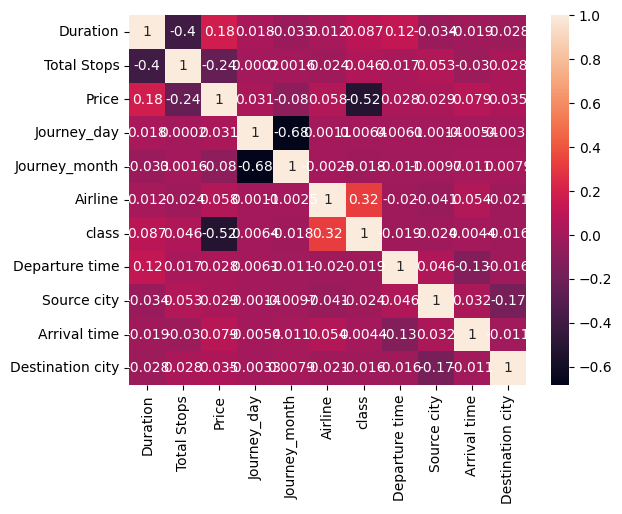

<Figure size 2000x2000 with 0 Axes>

In [77]:
sns.heatmap(df.corr(),annot=True)
plt.figure(figsize=(20,20))
plt.show

In [78]:
df.mean()  

Duration              140.154678
Total Stops             0.296829
Price               22840.100890
Journey_day            15.040337
Journey_month           0.804730
Airline                 5.044093
class                   1.043054
Departure time        131.794584
Source city             3.151218
Arrival time          161.293697
Destination city        3.187654
dtype: float64

In [79]:
x_temp = df.drop(['Price'],axis=1).values
y=df.Price.values

In [80]:
from sklearn.preprocessing import MinMaxScaler

# Assuming x_temp is a NumPy array
scaler = MinMaxScaler().fit_transform(x_temp)
X = pd.DataFrame(scaler)

In [81]:
X.describe().T[['min', 'mean', 'std', '50%', 'max']].style.background_gradient(axis=1)

,min,mean,std,50%,max
0,0.000000,0.291382,0.185340,0.266112,1.000000
1,0.000000,0.148415,0.330788,0.000000,1.000000
2,0.000000,0.501345,0.302840,0.533333,1.000000
3,0.000000,0.402365,0.314852,0.500000,1.000000
4,0.000000,0.630512,0.430783,1.000000,1.000000
5,0.000000,0.347685,0.320692,0.333333,1.000000
6,0.000000,0.514823,0.257839,0.492188,1.000000
7,0.000000,0.525203,0.328850,0.500000,1.000000
8,0.000000,0.608655,0.276783,0.675472,1.000000
9,0.000000,0.531276,0.328683,0.500000,1.000000


**MODELING

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.30,random_state=42) 

In [84]:
X_train.shape

(316461, 10)

In [85]:
y_test.shape

(135627,)

In [86]:
# If X_train is a DataFrame
print("Attributes in X_train:")
print(X_train.columns.tolist())

# If X_train is a NumPy array
print("Attributes in X_train:")
print(X_train.shape[1])  # This will give you the number of columns


Attributes in X_train:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Attributes in X_train:
10


In [87]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
LR = linear_model.LinearRegression()

LR.fit(X_train,y_train)
print('train score',LR.score(X_train,y_train))
print('test score',LR.score(X_test,y_test))
y_pred = LR.predict(X_test)
R2_LR=r2_score(y_test,y_pred)
print('r2 score',r2_score(y_test,y_pred))
MAE_LR=mean_absolute_error(y_test,y_pred)
print('MAE',mean_absolute_error(y_test,y_pred))
MSE_LR=mean_squared_error(y_test,y_pred)
print('MSE',mean_squared_error(y_test,y_pred))
MAPR_LR=mean_absolute_percentage_error(y_test,y_pred)
print('MAPR',mean_absolute_percentage_error(y_test,y_pred))


train score 0.41160746686374305
test score 0.41280401029961966
r2 score 0.41280401029961966
MAE 13083.536963391332
MSE 242056789.4929976
MAPR 0.9820879857308961


In [88]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [89]:
import xgboost
xgb = xgboost.XGBRegressor()
xgb.fit(X_train,y_train)
print('train score',xgb.score(X_train,y_train))
print('test score',xgb.score(X_test,y_test))
y_pred = xgb.predict(X_test)
R2_XGB=r2_score(y_test,y_pred)
print('r2 score',r2_score(y_test,y_pred))
MAE_XGB=mean_absolute_error(y_test,y_pred)
print('MAE',mean_absolute_error(y_test,y_pred))
MSE_XGB=mean_squared_error(y_test,y_pred)
print('MSE',mean_squared_error(y_test,y_pred))
MAPR_XGB=mean_absolute_percentage_error(y_test,y_pred)
print('MAPR',mean_absolute_percentage_error(y_test,y_pred))

train score 0.9478387755703885
test score 0.9463561536650819
r2 score 0.9463561536650819
MAE 2765.2647269609674
MSE 22113327.488002066
MAPR 0.14572563811161057


In [90]:
pred1=pd.DataFrame({"y_test":y_test,'y_pred':y_pred})
pred1

,y_test,y_pred
0,7180,8620.661133
1,12430,12517.630859
2,47329,47677.195312
3,6873,9855.969727
4,21817,15117.239258
...,...,...
135622,5342,5585.367188
135623,11933,9748.211914
135624,48676,54992.871094
135625,5290,8640.541016


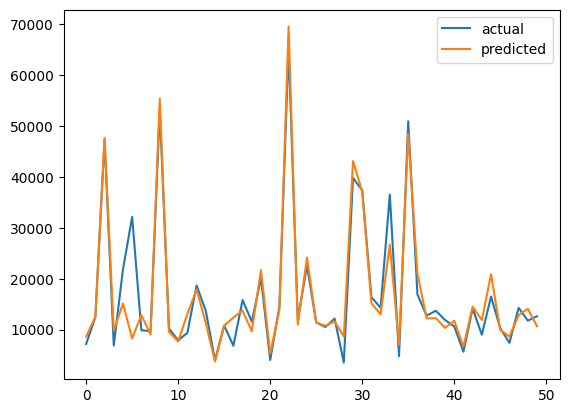

In [91]:
plt.plot(pred1[0:50])
plt.legend(['actual','predicted'])
plt.show()

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, max_features=9)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print('Accuracy of train model:',rf_model.score(X_train, y_train))
print('accuracy of test model',rf_model.score(X_test,y_test))
R2_RF=r2_score(y_test,y_pred)
print('r2 score',r2_score(y_test,y_pred))
MAE_RF=mean_absolute_error(y_test,y_pred)
print('MAE',mean_absolute_error(y_test,y_pred))
MSE_RF=mean_squared_error(y_test,y_pred)
print('MSE',mean_squared_error(y_test,y_pred))
MAPR_RF=mean_absolute_percentage_error(y_test,y_pred)
print('MAPR',mean_absolute_percentage_error(y_test,y_pred))

Accuracy of train model: 0.9173606643868
accuracy of test model 0.9158930146429726
r2 score 0.9158930146429726
MAE 3508.387136425345
MSE 34670990.957967415
MAPR 0.18621868139248993


In [93]:
to_predict = np.array([[32, 2, 12, 1, 0, 0, 210, 0, 242, 1]])
prediction = rf_model.predict(to_predict)
print(prediction)

[50794.57133394]


In [94]:
pred2=pd.DataFrame({"y_test":y_test,'y_pred':y_pred})
pred2

,y_test,y_pred
0,7180,7505.513722
1,12430,12842.707384
2,47329,44637.400285
3,6873,12822.286921
4,21817,14564.502128
...,...,...
135622,5342,5845.917299
135623,11933,11858.985836
135624,48676,55854.002959
135625,5290,11899.755742


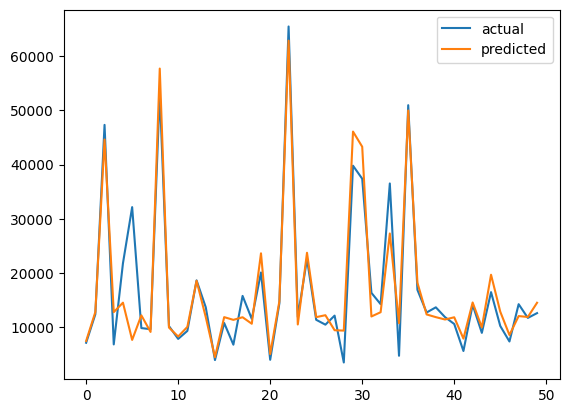

In [95]:
plt.plot(pred2[0:50])
plt.legend(['actual','predicted'])
plt.show()

In [96]:
from sklearn import datasets

from sklearn.tree import DecisionTreeRegressor  

Rtree = DecisionTreeRegressor(criterion='friedman_mse',max_depth = 10, max_features=9, random_state=42)
Rtree.fit(X_train, y_train)
y_pred = Rtree.predict(X_test)
print('Accuracy of train model:',Rtree.score(X_train, y_train))
print('accuracy of test model',Rtree.score(X_test,y_test))
R2_DT=r2_score(y_test,y_pred)
print('r2 score',r2_score(y_test,y_pred))
MAE_DT=mean_absolute_error(y_test,y_pred)
print('MAE',mean_absolute_error(y_test,y_pred))
MSE_DT=mean_squared_error(y_test,y_pred)
print('MSE',mean_squared_error(y_test,y_pred))
MAPR_DT=mean_absolute_percentage_error(y_test,y_pred)
print('MAPR',mean_absolute_percentage_error(y_test,y_pred))

Accuracy of train model: 0.9108108203061009
accuracy of test model 0.9097517661664724
r2 score 0.9097517661664724
MAE 3647.5514437951074
MSE 37202566.30210239
MAPR 0.19213057320830895


In [97]:
pred3=pd.DataFrame({"y_test":y_test,'y_pred':y_pred})
pred3

,y_test,y_pred
0,7180,7812.219114
1,12430,13031.828476
2,47329,44674.757921
3,6873,13031.828476
4,21817,15120.003446
...,...,...
135622,5342,5956.639518
135623,11933,12098.113615
135624,48676,51419.760000
135625,5290,12098.113615


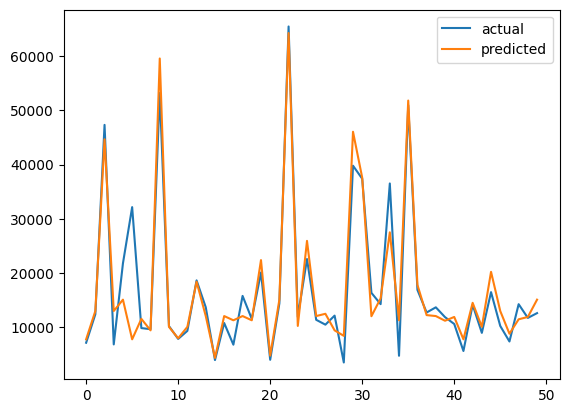

In [98]:
plt.plot(pred3[0:50])
plt.legend(['actual','predicted'])
plt.show()

In [99]:
# Define the models and their results
models = ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor","XGBRegressor"]
MSE = [MSE_LR, MSE_DT, MSE_RF,MSE_XGB]
MAPR = [MAPR_LR, MAPR_DT, MAPR_RF,MAPR_XGB]
MAE = [MAE_LR, MAE_DT, MAE_RF,MAE_XGB]
R2 = [R2_LR, R2_DT, R2_RF,R2_XGB]

# Create a DataFrame to display the results with indexing starting from 1 and labeled as 'Model no.'
results = pd.DataFrame({
    'Model': models,
    'MSE': MSE,
    'MAPR': MAPR,
    'MAE': MAE,
    'R2 Squared': R2
}, index=range(1, len(models) + 1))  # Start indexing from 1

# Rename the index column to 'Model no.'
results.index.name = 'Model no.'

# Function to highlight minimum MSE, RMSE, MAE, and maximum R-squared values and make the font bold
def highlight_min_max(val):
    style = ''
    if isinstance(val, (int, float)):
        if val == results['MSE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['MAPR'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['MAE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['R2 Squared'].max():
            style += 'background-color: rgba(0, 0, 128, 0.3); color: white; font-weight: bold;'
    return style


# Apply the highlight_min_max function to the entire DataFrame
styled_results = results.style.applymap(highlight_min_max)

# Display the styled results DataFrame
styled_results

C:\Users\janvi.yadav\AppData\Local\Temp\ipykernel_17828\3389682775.py:36: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_results = results.style.applymap(highlight_min_max)


,Model,MSE,MAPR,MAE,R2 Squared
Model no.,,,,,
1,Linear Regression,242056789.492998,0.982088,13083.536963,0.412804
2,Decision Tree Regressor,37202566.302102,0.192131,3647.551444,0.909752
3,Random Forest Regressor,34670990.957967,0.186219,3508.387136,0.915893
4,XGBRegressor,22113327.488002,0.145726,2765.264727,0.946356


In [100]:
def predict_price(Duration, Total_Stops, Journey_day, Journey_month, Airline, flight_class, Departure_time, Source_city, Arrival_time, Destination_city):
    # Assuming you have already trained a model and have access to it
    # Also, assuming you have a dataframe X containing the features used for training the model
    
    # Assuming you have already encoded categorical variables and created dummy variables
    
    # Assuming you have a trained model named lr_clf
    
    # Your code for creating the feature vector 'x' based on the input parameters
    x = np.zeros(len(X.columns))
    x[0] = Duration
    x[1] = Total_Stops
    x[2] = Journey_day
    x[3] = Journey_month
    x[4] = Airline
    x[5] = flight_class
    x[6] = Departure_time
    x[7] = Source_city
    x[8] = Arrival_time
    x[9] = Destination_city

    # Assuming you have already handled encoding categorical variables and creating dummy variables for the new data
    # If not, you should perform the necessary encoding here before making predictions

    # Making prediction
    # Assuming you have trained an XGBoost model named xgb_model
    return xgb.predict([x])[0]


In [101]:
predicted_price = predict_price('126', '0', '05', '02', '4', '1', '240', '3', '8', '6')
print("Predicted Price:", predicted_price)

Predicted Price: 13172.955


In [102]:
df.head()

,Duration,Total Stops,Price,Journey_day,Journey_month,Airline,class,Departure time,Source city,Arrival time,Destination city
0,17,2,5335,15,0,6,1,210,3,242,6
1,20,2,5899,15,0,5,1,246,3,16,6
2,18,2,5801,15,0,4,1,240,3,8,6
3,17,2,5794,15,0,6,1,196,3,228,6
4,18,2,5955,15,0,0,1,210,3,243,6


In [103]:
df.tail()

,Duration,Total Stops,Price,Journey_day,Journey_month,Airline,class,Departure time,Source city,Arrival time,Destination city
452083,149,0,65028,5,2,8,0,51,0,215,2
452084,127,0,69254,5,2,8,0,31,0,173,2
452085,127,0,69254,5,2,8,0,31,0,173,2
452086,126,0,72980,5,2,8,0,74,0,215,2
452087,126,0,72980,5,2,8,0,74,0,215,2


##Save the model to reuse it again.

In [104]:
import pickle
# open a file, where you ant to store the data
file = open('flight_xgb.pkl', 'wb')

# dump information to that file
pickle.dump(xgb, file)

In [106]:
# model = open('flight_xgb.pkl','rb')
# forest = pickle.load(model)

In [107]:
file = open('flight_randForest.pkl', 'wb')

# dump information to that file
pickle.dump(rf_model, file)


In [109]:
# y_prediction = forest.predict(X_test)

In [110]:
# r2_score(y_test, y_prediction)

NameError: name 'y_prediction' is not defined

In [111]:
X_train.head(15)

,0,1,2,3,4,5,6,7,8,9
177440,0.282744,0.0,0.733333,0.5,1.000,1.000000,0.816406,0.166667,0.271698,0.500000
234023,0.523909,0.0,0.333333,0.5,1.000,0.000000,0.773438,0.166667,0.667925,0.000000
11806,0.600832,0.0,0.466667,0.5,1.000,1.000000,0.507812,0.500000,0.550943,1.000000
181706,0.316008,0.0,0.500000,0.0,0.000,0.000000,0.867188,0.166667,0.381132,1.000000
247625,0.494802,0.0,0.100000,1.0,1.000,0.000000,0.894531,0.666667,0.732075,0.500000
226797,0.247401,0.0,0.300000,0.5,1.000,1.000000,0.339844,0.166667,0.833962,0.333333
169376,0.187110,0.0,1.000000,0.0,1.000,0.000000,0.195312,0.166667,0.584906,0.500000
259846,0.122661,0.0,0.100000,1.0,1.000,0.000000,0.210938,0.666667,0.483019,1.000000
274122,0.126819,0.0,0.000000,0.5,0.625,0.333333,0.648438,0.666667,0.913208,0.833333
403109,0.399168,0.0,0.566667,0.5,0.750,0.333333,0.964844,0.333333,0.626415,0.000000


In [112]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [113]:
print(selection.feature_importances_)

[0.02655088 0.0452945  0.03052241 0.01719942 0.03297617 0.76756938
 0.02148387 0.01765374 0.02352192 0.0172277 ]


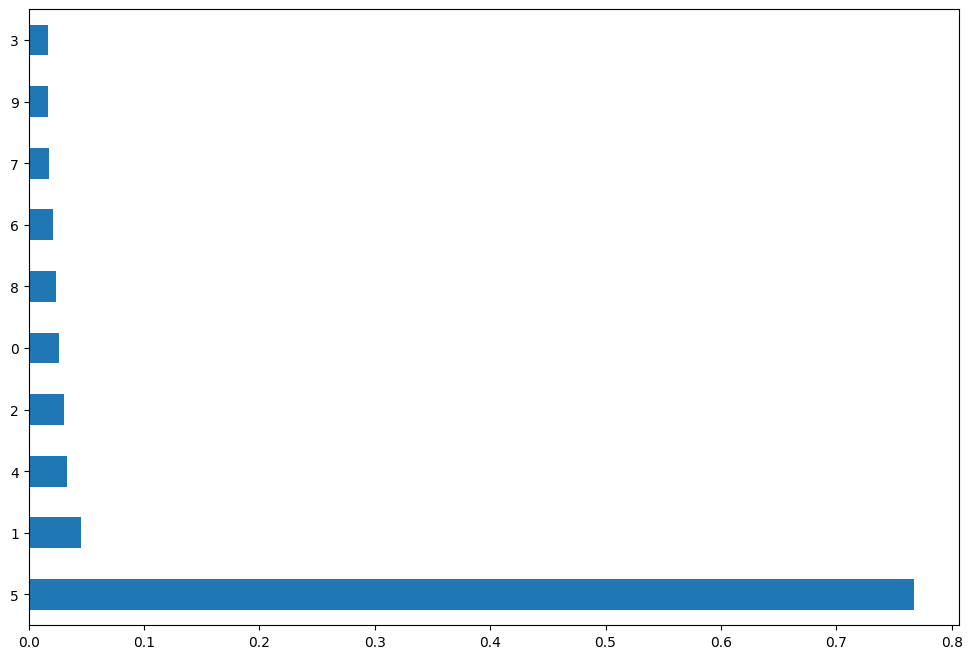

In [114]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [116]:
from xgboost import XGBRegressor 
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor()
xgboost_model = XGBRegressor()

reg_rf.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)